# 📊 שלב 1: חקירת נתונים וויזואליזציה (Data Exploration)

## מטרה
בשלב זה נבצע ניתוח ראשוני של נתוני מכירות למבורגיני 2020-2025:
- טעינה וסקירה ראשונית של הנתונים
- ניתוח סטטיסטי בסיסי
- ויזואליזציות מקיפות
- זיהוי תובנות עסקיות

---

In [8]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# הגדרות עיצוב
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
rcParams['figure.figsize'] = (14, 6)
rcParams['font.size'] = 10

print("✓ כל הספריות נטענו בהצלחה")

✓ כל הספריות נטענו בהצלחה


## 1. טעינת הנתונים

In [9]:
# טעינת הנתונים
df = pd.read_csv('lamborghini_sales_2020_2025.csv')
print(f"נטענו {len(df)} שורות נתונים")
print(f"\nעמודות: {list(df.columns)}")

נטענו 54 שורות נתונים

עמודות: ['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)', 'Horsepower', 'Sales Volume', 'Turbo (Yes/No)']


In [10]:
# הצגת השורות הראשונות
print("═" * 80)
print("הצצה ראשונה לנתונים:")
print("═" * 80)
df.head(10)

════════════════════════════════════════════════════════════════════════════════
הצצה ראשונה לנתונים:
════════════════════════════════════════════════════════════════════════════════


,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo (Yes/No)
0,Urus,2020,EMEA,Black,Gasoline,230000,641,4500,Yes
1,Urus,2020,Americas,White,Gasoline,240000,641,4800,Yes
2,Urus,2020,APAC,Red,Gasoline,235000,641,2700,Yes
3,Huracán,2020,EMEA,Yellow,Gasoline,260000,631,2500,Yes
4,Huracán,2020,Americas,Orange,Gasoline,270000,631,2600,Yes
5,Huracán,2020,APAC,Black,Gasoline,265000,631,1500,Yes
6,Aventador,2020,EMEA,Black,Gasoline,550000,769,600,Yes
7,Aventador,2020,Americas,White,Gasoline,560000,769,650,Yes
8,Aventador,2020,APAC,Red,Gasoline,555000,769,400,Yes
9,Urus,2021,EMEA,Silver,Gasoline,235000,641,5021,Yes


## 2. מידע כללי על הנתונים

In [11]:
# מידע על הנתונים
print("═" * 80)
print("מידע כללי על הנתונים:")
print("═" * 80)
df.info()
print("\n" + "═" * 80)
print("בדיקת ערכים חסרים:")
print("═" * 80)
print(df.isnull().sum())

════════════════════════════════════════════════════════════════════════════════
מידע כללי על הנתונים:
════════════════════════════════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             54 non-null     object
 1   Year              54 non-null     int64 
 2   Region            54 non-null     object
 3   Color             54 non-null     object
 4   Fuel Type         54 non-null     object
 5   Base Price (USD)  54 non-null     int64 
 6   Horsepower        54 non-null     int64 
 7   Sales Volume      54 non-null     int64 
 8   Turbo (Yes/No)    54 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.9+ KB

════════════════════════════════════════════════════════════════════════════════
בדיקת ערכים חסרים:
═════════════════════════════════════════════════════════

In [12]:
# סטטיסטיקה תיאורית
print("═" * 80)
print("סטטיסטיקה תיאורית:")
print("═" * 80)
df.describe()

════════════════════════════════════════════════════════════════════════════════
סטטיסטיקה תיאורית:
════════════════════════════════════════════════════════════════════════════════


,Year,Base Price (USD),Horsepower,Sales Volume
count,54.000000,54.000000,54.000000,54.000000
mean,2022.500000,374722.222222,718.277778,2618.037037
std,1.723861,136293.304237,121.645234,1785.625201
min,2020.000000,230000.000000,631.000000,63.000000
25%,2021.000000,265000.000000,631.000000,1187.500000
50%,2022.500000,300000.000000,641.000000,2543.000000
75%,2024.000000,550000.000000,769.000000,3896.500000
max,2025.000000,590000.000000,1001.000000,6200.000000


In [13]:
# ניתוח קטגוריאלי
print("═" * 80)
print("ערכים ייחודיים בכל עמודה קטגוריאלית:")
print("═" * 80)
categorical_cols = ['Model', 'Region', 'Color', 'Fuel Type', 'Turbo (Yes/No)']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} ערכים ייחודיים")
    print(df[col].value_counts())
    print("-" * 40)

════════════════════════════════════════════════════════════════════════════════
ערכים ייחודיים בכל עמודה קטגוריאלית:
════════════════════════════════════════════════════════════════════════════════

Model: 6 ערכים ייחודיים
Model
Huracán                15
Urus                   12
Aventador              12
Revuelto                6
Urus SE                 6
Huracán (Temerario)     3
Name: count, dtype: int64
----------------------------------------

Region: 3 ערכים ייחודיים
Region
EMEA        18
Americas    18
APAC        18
Name: count, dtype: int64
----------------------------------------

Color: 9 ערכים ייחודיים
Color
Black     16
White     11
Red        9
Orange     6
Yellow     5
Silver     3
Blue       2
Green      1
Grey       1
Name: count, dtype: int64
----------------------------------------

Fuel Type: 2 ערכים ייחודיים
Fuel Type
Gasoline    39
Hybrid      15
Name: count, dtype: int64
----------------------------------------

Turbo (Yes/No): 1 ערכים ייחודיים
Turbo (Yes/No)
Ye

## 3. ויזואליזציות - ניתוח מכירות

In [14]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt

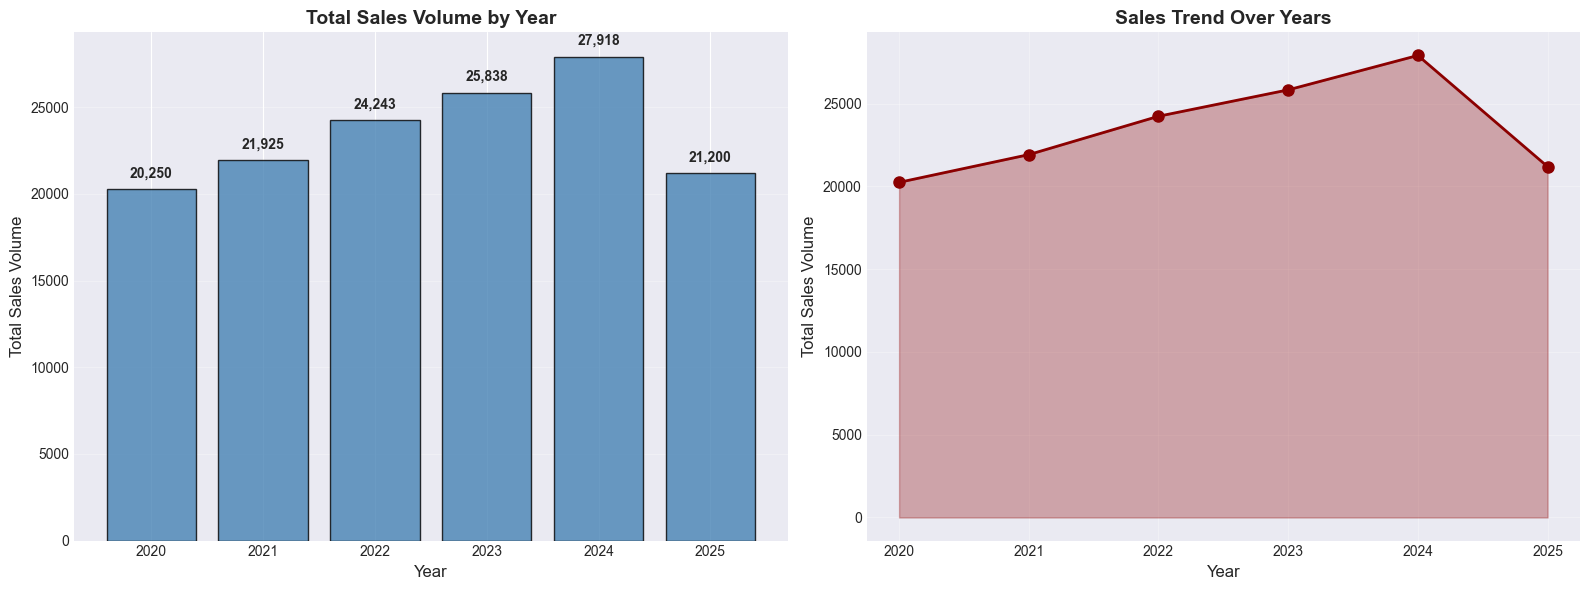


שיעור צמיחה כולל: 4.7%


In [16]:
# מכירות לפי שנה
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sales_by_year = df.groupby('Year')['Sales Volume'].sum()
axes[0].bar(sales_by_year.index, sales_by_year.values, color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_title('Total Sales Volume by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Total Sales Volume', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_by_year.values):
    axes[0].text(sales_by_year.index[i], v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')
import matplotlib.pyplot as plt

axes[1].plot(sales_by_year.index, sales_by_year.values, marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].set_title('Sales Trend Over Years', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Sales Volume', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(sales_by_year.index, sales_by_year.values, alpha=0.3, color='darkred')

plt.tight_layout()
plt.show()
# תיקון: יש לייבא את matplotlib.pyplot כ-plt לפני שימוש ב-plt






print(f"\nשיעור צמיחה כולל: {((sales_by_year.iloc[-1] / sales_by_year.iloc[0] - 1) * 100):.1f}%")

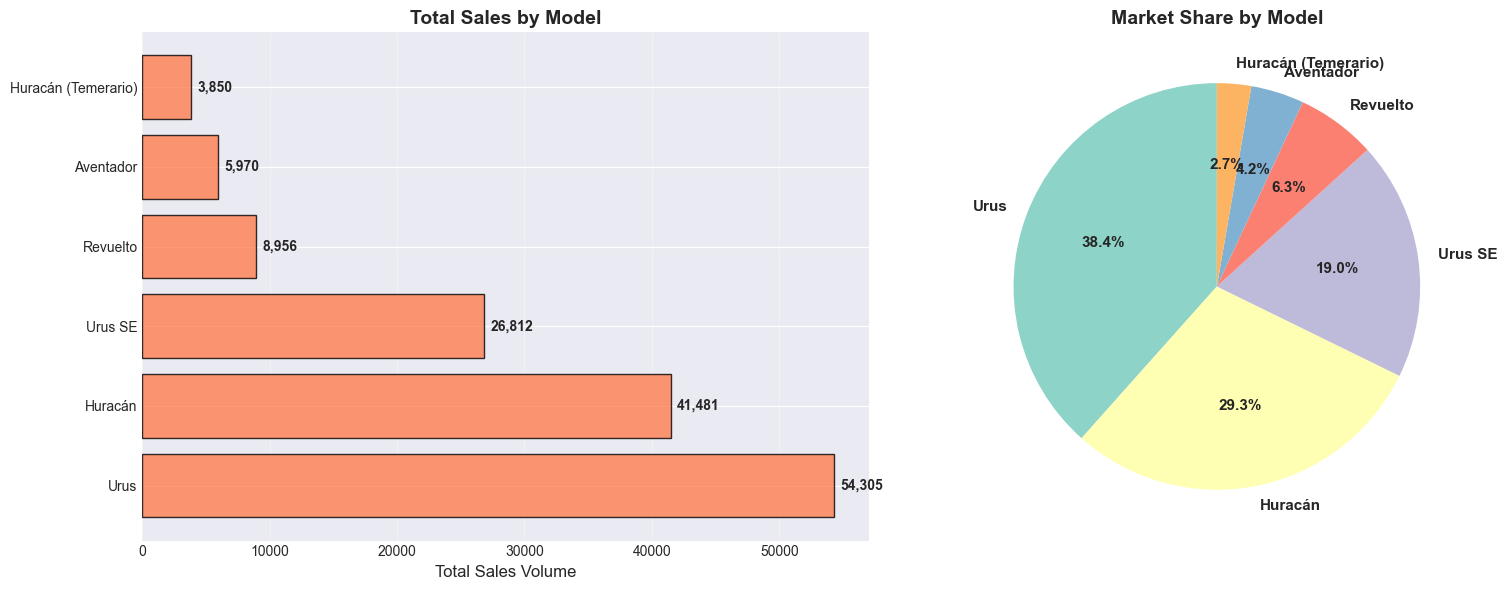

In [17]:
# מכירות לפי דגם
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sales_by_model = df.groupby('Model')['Sales Volume'].sum().sort_values(ascending=False)

axes[0].barh(sales_by_model.index, sales_by_model.values, color='coral', alpha=0.8, edgecolor='black')
axes[0].set_title('Total Sales by Model', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Sales Volume', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(sales_by_model.values):
    axes[0].text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

colors = plt.cm.Set3(range(len(sales_by_model)))
axes[1].pie(sales_by_model.values, labels=sales_by_model.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Market Share by Model', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

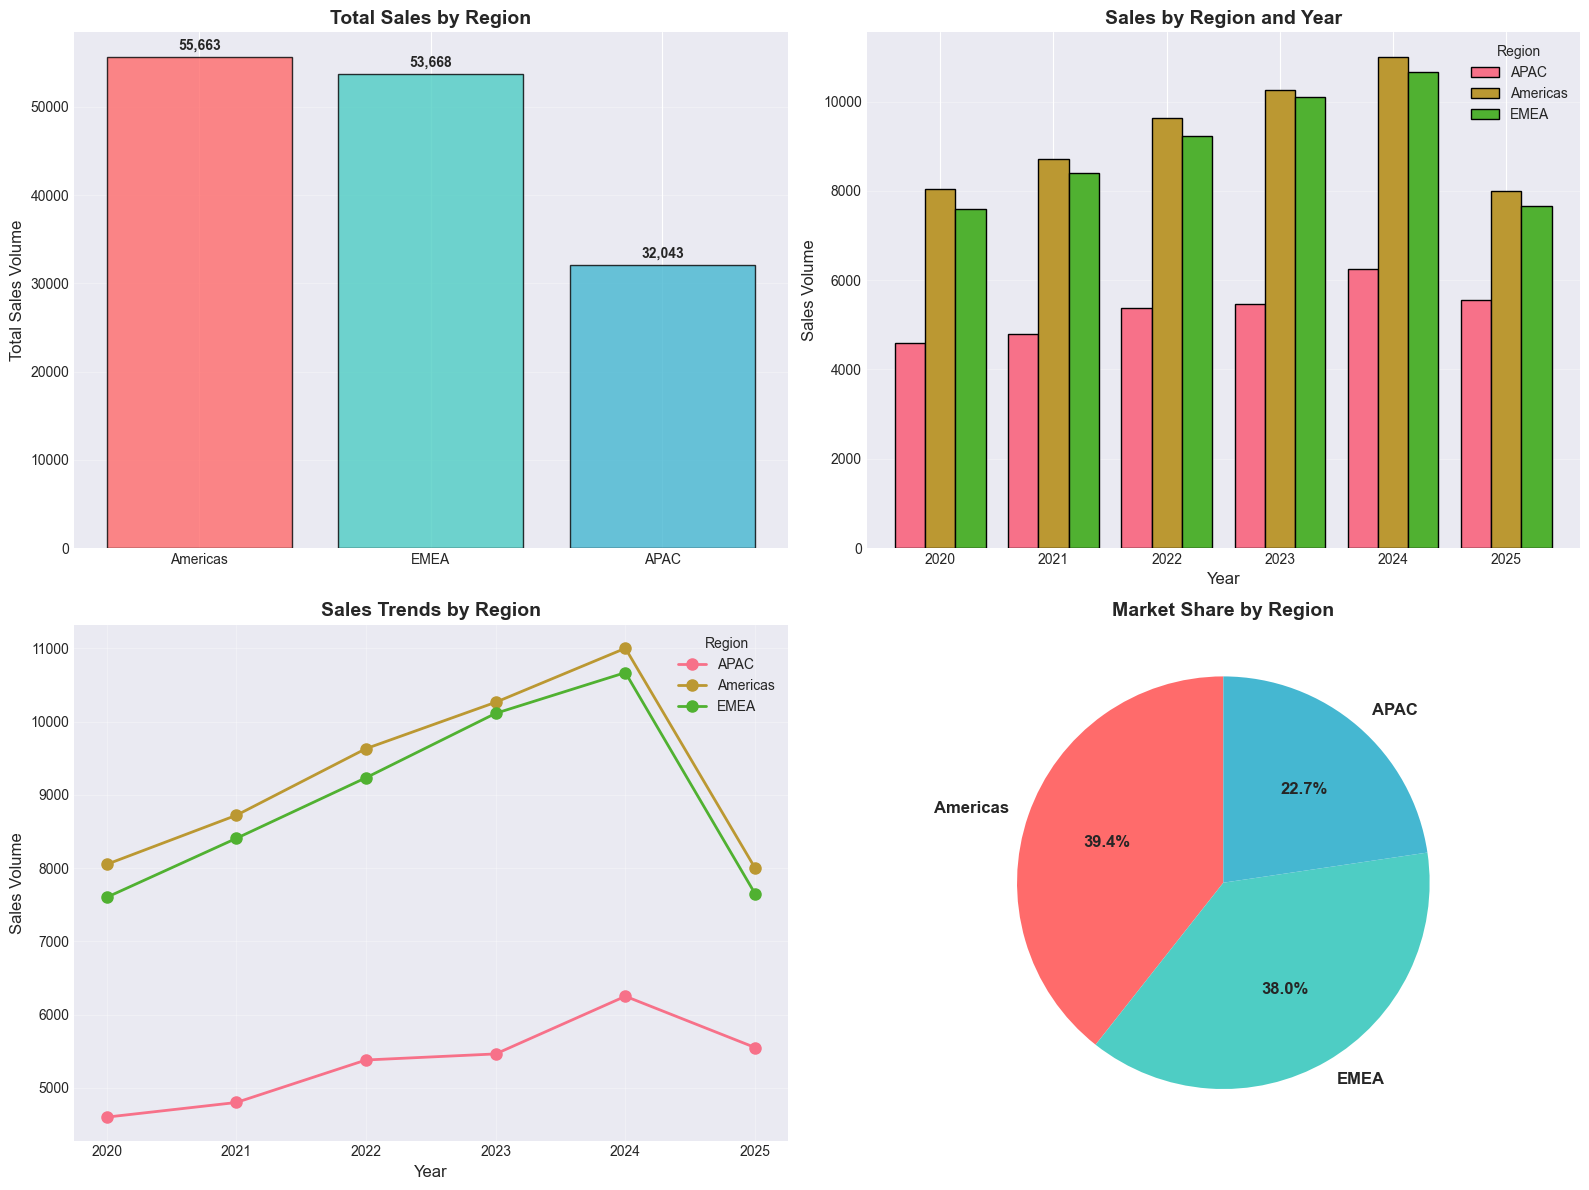

In [18]:
# מכירות לפי אזור
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sales_by_region = df.groupby('Region')['Sales Volume'].sum().sort_values(ascending=False)
axes[0, 0].bar(sales_by_region.index, sales_by_region.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
               alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Total Sales by Region', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales Volume', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_by_region.values):
    axes[0, 0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

sales_region_year = df.pivot_table(values='Sales Volume', index='Year', columns='Region', aggfunc='sum')
sales_region_year.plot(kind='bar', ax=axes[0, 1], width=0.8, edgecolor='black')
axes[0, 1].set_title('Sales by Region and Year', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Sales Volume', fontsize=12)
axes[0, 1].legend(title='Region', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=0)

for region in sales_region_year.columns:
    axes[1, 0].plot(sales_region_year.index, sales_region_year[region], marker='o', 
                    linewidth=2, markersize=8, label=region)
axes[1, 0].set_title('Sales Trends by Region', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Sales Volume', fontsize=12)
axes[1, 0].legend(title='Region', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].pie(sales_by_region.values, labels=sales_by_region.index, autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Market Share by Region', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Tamir\AppData\Local\Temp\ipykernel_14380\2970150974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Model', x='Base Price (USD)', ax=axes[0, 1], order=models_order, palette='Set2')
C:\Users\Tamir\AppData\Local\Temp\ipykernel_14380\2970150974.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Fuel Type', y='Base Price (USD)', ax=axes[1, 1], palette='muted')


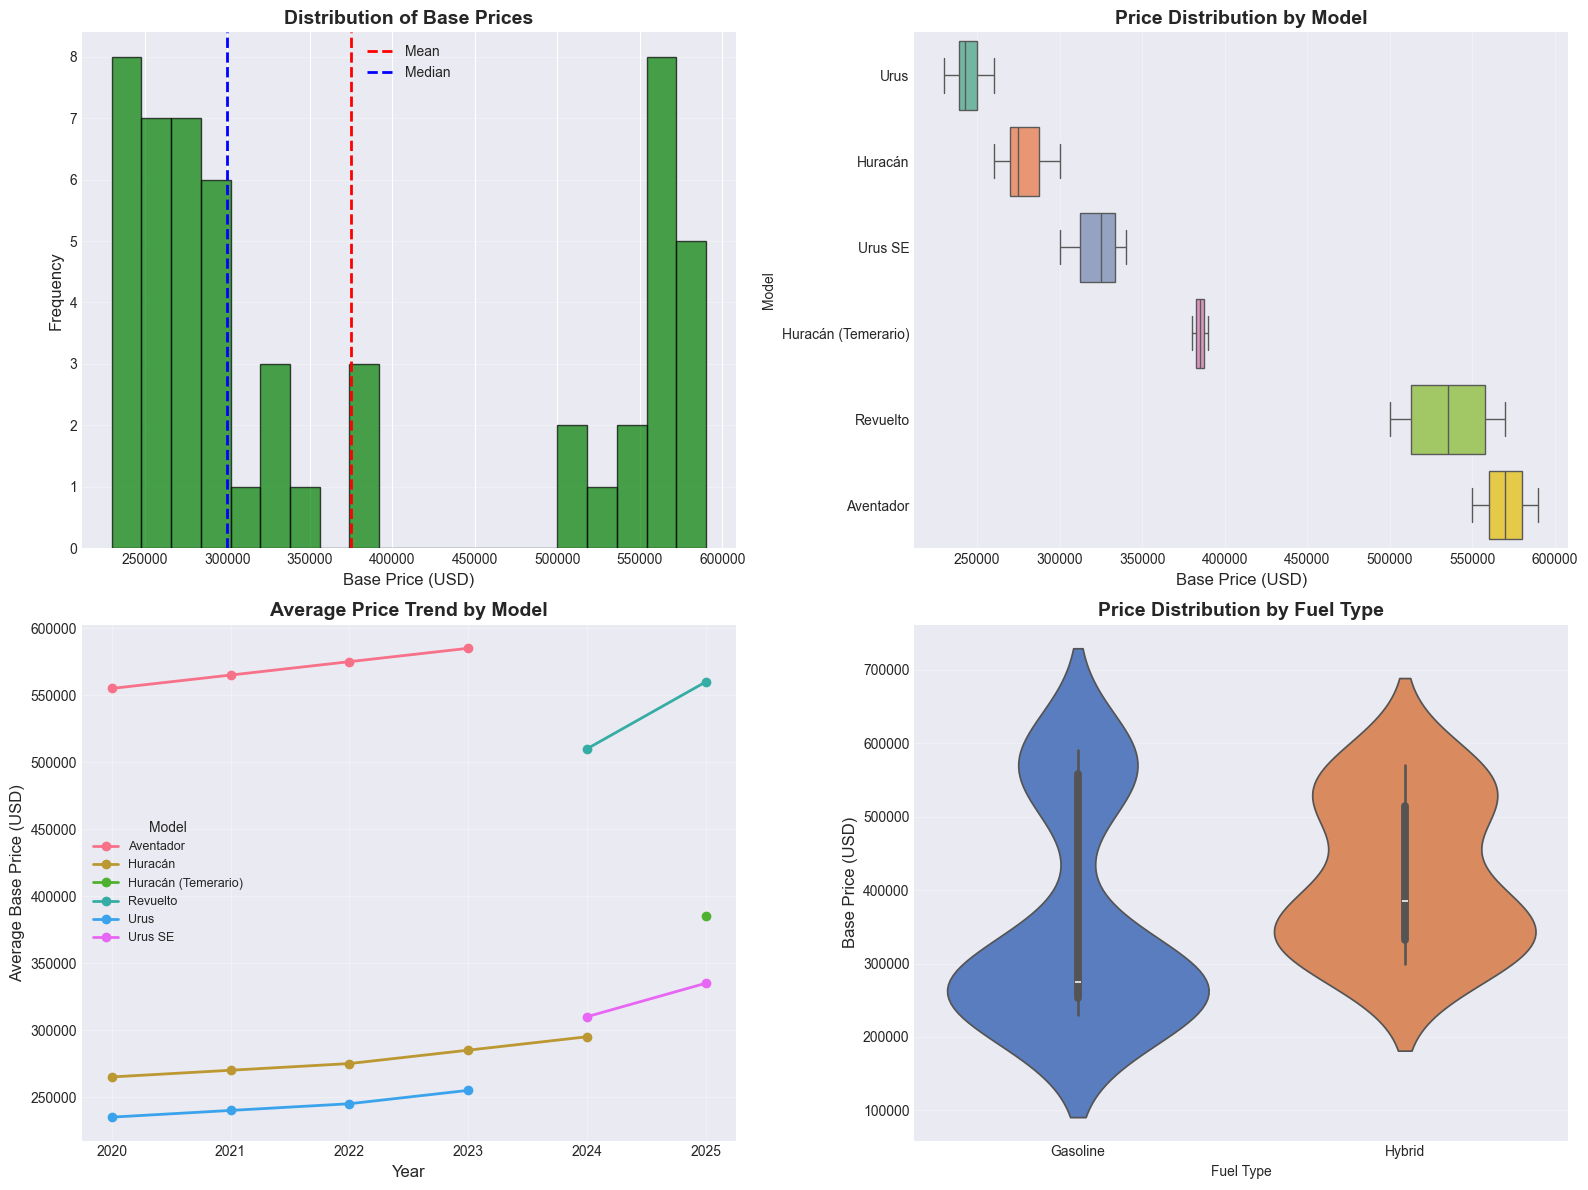


מחיר ממוצע: $374,722
מחיר חציוני: $300,000
מחיר מינימלי: $230,000
מחיר מקסימלי: $590,000


In [19]:
# התפלגות מחירים
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(df['Base Price (USD)'], bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Base Prices', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Base Price (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(df['Base Price (USD)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df['Base Price (USD)'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
axes[0, 0].legend()

models_order = df.groupby('Model')['Base Price (USD)'].median().sort_values().index
sns.boxplot(data=df, y='Model', x='Base Price (USD)', ax=axes[0, 1], order=models_order, palette='Set2')
axes[0, 1].set_title('Price Distribution by Model', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Base Price (USD)', fontsize=12)
axes[0, 1].grid(axis='x', alpha=0.3)

price_model_year = df.pivot_table(values='Base Price (USD)', index='Year', columns='Model', aggfunc='mean')
price_model_year.plot(kind='line', ax=axes[1, 0], marker='o', linewidth=2, markersize=6)
axes[1, 0].set_title('Average Price Trend by Model', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Average Base Price (USD)', fontsize=12)
axes[1, 0].legend(title='Model', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

sns.violinplot(data=df, x='Fuel Type', y='Base Price (USD)', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Price Distribution by Fuel Type', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Base Price (USD)', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nמחיר ממוצע: ${df['Base Price (USD)'].mean():,.0f}")
print(f"מחיר חציוני: ${df['Base Price (USD)'].median():,.0f}")
print(f"מחיר מינימלי: ${df['Base Price (USD)'].min():,.0f}")
print(f"מחיר מקסימלי: ${df['Base Price (USD)'].max():,.0f}")

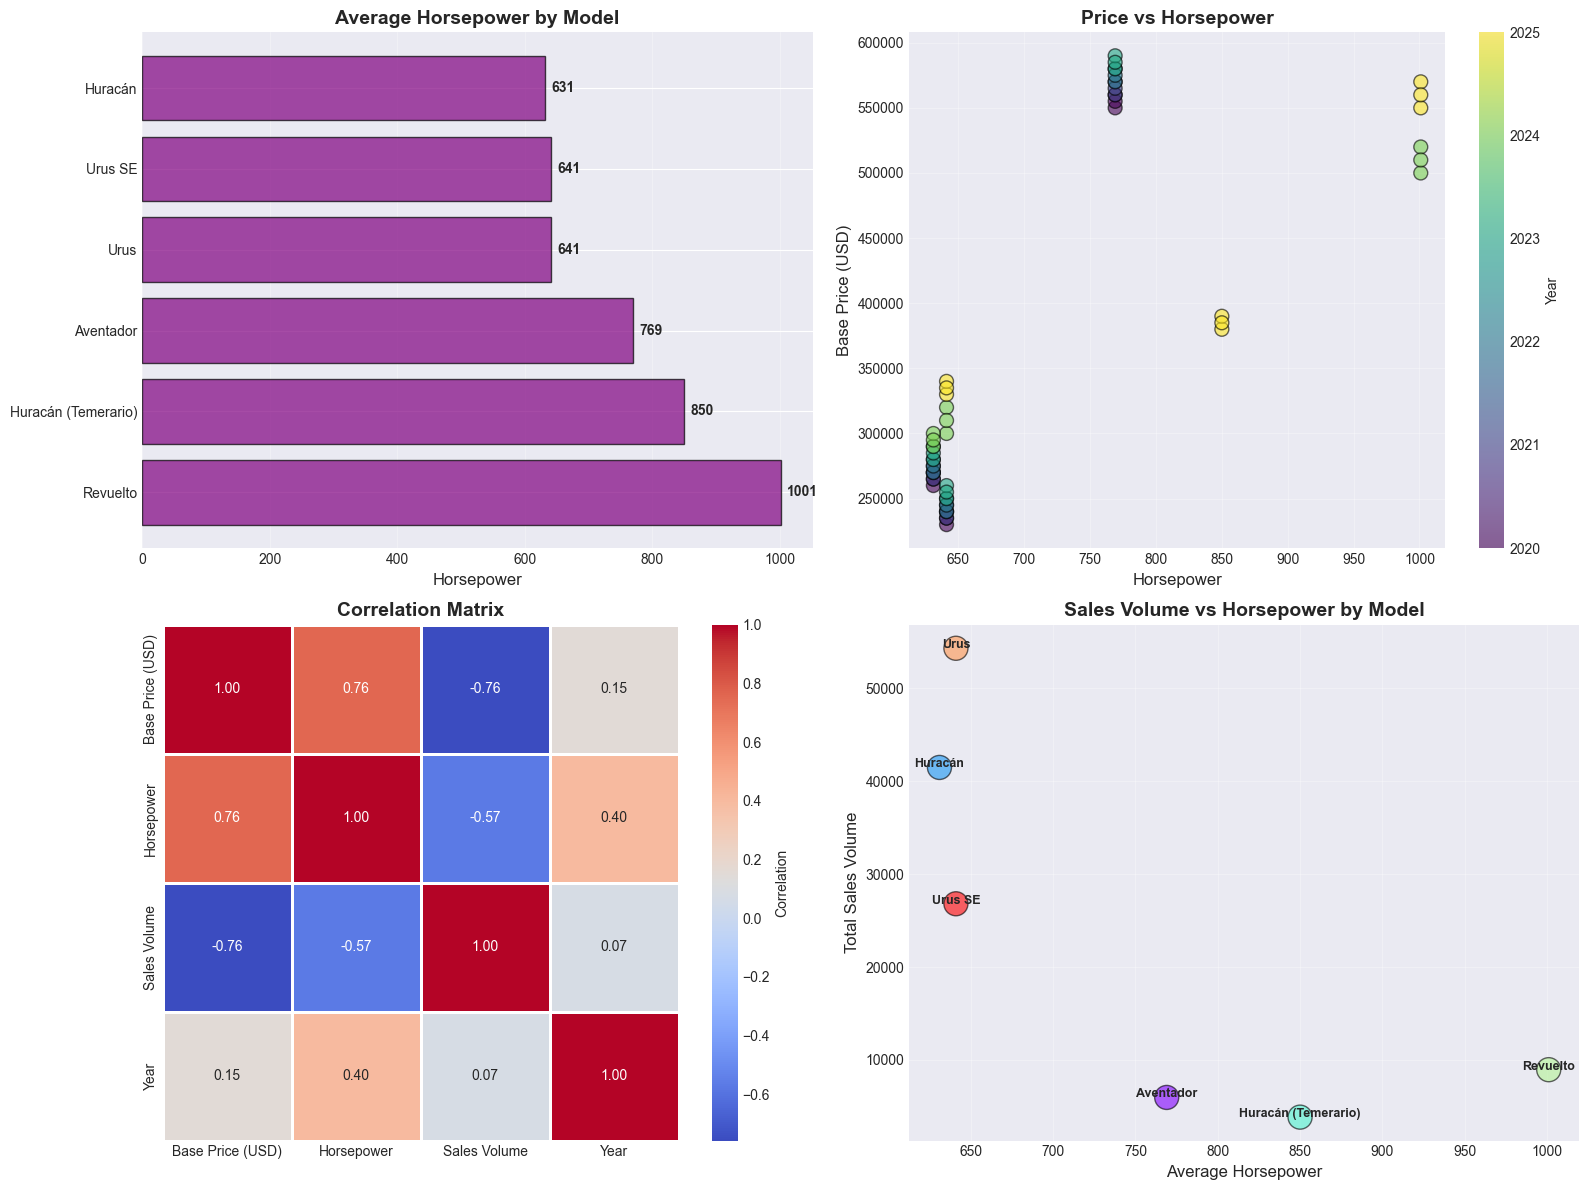

In [20]:
# ניתוח כוח סוס וקורלציות
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

hp_by_model = df.groupby('Model')['Horsepower'].mean().sort_values(ascending=False)
axes[0, 0].barh(hp_by_model.index, hp_by_model.values, color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Average Horsepower by Model', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Horsepower', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(hp_by_model.values):
    axes[0, 0].text(v + 10, i, f'{v:.0f}', va='center', fontweight='bold')

scatter = axes[0, 1].scatter(df['Horsepower'], df['Base Price (USD)'], 
                             c=df['Year'], cmap='viridis', alpha=0.6, s=100, edgecolor='black')
axes[0, 1].set_title('Price vs Horsepower', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Horsepower', fontsize=12)
axes[0, 1].set_ylabel('Base Price (USD)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Year')

numeric_cols = ['Base Price (USD)', 'Horsepower', 'Sales Volume', 'Year']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0], 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Correlation Matrix', fontsize=14, fontweight='bold')

model_stats = df.groupby('Model').agg({'Horsepower': 'mean', 'Sales Volume': 'sum'})
axes[1, 1].scatter(model_stats['Horsepower'], model_stats['Sales Volume'], 
                   s=300, alpha=0.6, c=range(len(model_stats)), cmap='rainbow', edgecolor='black')
for idx, row in model_stats.iterrows():
    axes[1, 1].annotate(idx, (row['Horsepower'], row['Sales Volume']), 
                        fontsize=9, ha='center', fontweight='bold')
axes[1, 1].set_title('Sales Volume vs Horsepower by Model', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Horsepower', fontsize=12)
axes[1, 1].set_ylabel('Total Sales Volume', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. סיכום תובנות

In [21]:
print("="*80)
print("                    תובנות עיקריות מניתוח הנתונים")
print("="*80)

total_sales = df['Sales Volume'].sum()
print(f"\n📊 1. סך כל המכירות 2020-2025: {total_sales:,} יחידות")

best_model = df.groupby('Model')['Sales Volume'].sum().idxmax()
best_model_sales = df.groupby('Model')['Sales Volume'].sum().max()
print(f"\n🏆 2. דגם הכי נמכר: {best_model} ({best_model_sales:,} יחידות)")

best_region = df.groupby('Region')['Sales Volume'].sum().idxmax()
best_region_sales = df.groupby('Region')['Sales Volume'].sum().max()
print(f"\n🌍 3. אזור מוביל: {best_region} ({best_region_sales:,} יחידות)")

best_year = df.groupby('Year')['Sales Volume'].sum().idxmax()
best_year_sales = df.groupby('Year')['Sales Volume'].sum().max()
print(f"\n📅 4. שנה עם הכי הרבה מכירות: {best_year} ({best_year_sales:,} יחידות)")

sales_2020 = df[df['Year'] == 2020]['Sales Volume'].sum()
sales_2025 = df[df['Year'] == 2025]['Sales Volume'].sum()
growth = ((sales_2025 / sales_2020) - 1) * 100
print(f"\n📈 5. צמיחה 2020-2025: {growth:+.1f}%")

print("\n" + "="*80)
print("\n✅ ניתוח הנתונים הושלם!")
print("📌 המשך למחברת הבאה: 2_data_preprocessing.ipynb")
print("="*80)

                    תובנות עיקריות מניתוח הנתונים

📊 1. סך כל המכירות 2020-2025: 141,374 יחידות

🏆 2. דגם הכי נמכר: Urus (54,305 יחידות)

🌍 3. אזור מוביל: Americas (55,663 יחידות)

📅 4. שנה עם הכי הרבה מכירות: 2024 (27,918 יחידות)

📈 5. צמיחה 2020-2025: +4.7%


✅ ניתוח הנתונים הושלם!
📌 המשך למחברת הבאה: 2_data_preprocessing.ipynb


In [22]:
# שמירת הנתונים לשימוש במחברות הבאות
df.to_csv('data_for_preprocessing.csv', index=False)
print("✓ הנתונים נשמרו לקובץ data_for_preprocessing.csv")

✓ הנתונים נשמרו לקובץ data_for_preprocessing.csv
